In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import random

In [22]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [23]:
#Numpy has a built-in random module that we can use
#we can also add size in np.random

np.random.uniform(-90,90, size=10)

array([-46.14979038,  31.98186577, -82.00565733, -80.1283364 ,
        57.38339594, -17.127492  ,  63.26265504, -29.48628852,
        60.355639  , -72.72282463])

In [24]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#zip() converts lats and lngs into tuple that can be access  by index 0 and 1
lat_lngs = zip(lats, lngs)
lat_lngs

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [26]:
from citipy import citipy

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


619

In [45]:
cities

['hilo',
 'port alfred',
 'taolanaro',
 'vaini',
 'mataura',
 'tilichiki',
 'barrow',
 'hasaki',
 'hambantota',
 'borkenes',
 'east london',
 'san patricio',
 'norman wells',
 'georgetown',
 'puerto ayora',
 'henties bay',
 'ugoofaaru',
 'mount isa',
 'carnarvon',
 'tuktoyaktuk',
 'flin flon',
 'vanavara',
 'mnogovershinnyy',
 'lasa',
 'albany',
 'punta arenas',
 'camp verde',
 'paoua',
 'kapra',
 'saint-philippe',
 'hobart',
 'coahuayana',
 'ijui',
 'nanortalik',
 'hithadhoo',
 'mahebourg',
 'bredasdorp',
 'alzamay',
 'rikitea',
 'innisfail',
 'castrillon',
 'labuhan',
 'qaqortoq',
 'kaura namoda',
 'atuona',
 'gumdag',
 'tunduru',
 'hagere hiywet',
 'kapaa',
 'solovetskiy',
 'busselton',
 'pacifica',
 'luderitz',
 'namibe',
 'upernavik',
 'chokurdakh',
 'bam',
 'jamestown',
 'airai',
 'paamiut',
 'mount gambier',
 'hami',
 'buraydah',
 'sangmelima',
 'yellowknife',
 'bacolod',
 'palmer',
 'korla',
 'cap malheureux',
 'hermanus',
 'kondagaon',
 'khatanga',
 'cooma',
 'tsihombe',
 'aca

In [12]:
import requests

In [16]:
from config import api_key

api_key


'b97aa7537aaf8a9e26f1d48d75ad935b'

In [49]:
new_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial" 

url = new_url + "&appid=" + api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b97aa7537aaf8a9e26f1d48d75ad935b


In [50]:
from datetime import datetime

In [17]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [51]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as Error:
        print("City not found. Skipping...")
        print(Error)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
'coord'
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tilichiki
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | borkenes
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | ugoofaaru
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | flin flon
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 | tuatapere
Processing Record 35 of Set 4 | de lier
Processing Record 36 of Set 4 | manassas park
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
'coord'
Processing Record 38 of Set 4 | beloha
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | shemonaikha
Processing Record 41 of Set 4 | ngukurr
City not found. Skipping...
'coord'
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
'coord'
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | kurilsk
Processing Record 45 of Set 4 | shishou
Processing Record 46 of Set 4 | jalu
Processing Record 47 of Set 4 | gurlan
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | satellite beach
Processing Record 50 of Set 4 | leh
Processing Record 1 of Set 5 | lincoln
Processing Record 2 of Set 5 | qom
Processing Record 3 of Set 5 | kupang
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | clyde river
Pr

Processing Record 23 of Set 8 | jiwani
Processing Record 24 of Set 8 | binzhou
Processing Record 25 of Set 8 | harper
Processing Record 26 of Set 8 | valley city
Processing Record 27 of Set 8 | agucadoura
Processing Record 28 of Set 8 | chabahar
Processing Record 29 of Set 8 | avera
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | jinchang
Processing Record 32 of Set 8 | north platte
Processing Record 33 of Set 8 | hovd
Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | hihifo
City not found. Skipping...
'coord'
Processing Record 36 of Set 8 | poitiers
Processing Record 37 of Set 8 | mopti
Processing Record 38 of Set 8 | shchelyayur
City not found. Skipping...
'coord'
Processing Record 39 of Set 8 | mullaitivu
City not found. Skipping...
'coord'
Processing Record 40 of Set 8 | matara
Processing Record 41 of Set 8 | san pedro
Processing Record 42 of Set 8 | rena
Processing Record 43 of Set 8 | inuvik
Processing Record 44 of Set 8 | itabi

Processing Record 9 of Set 12 | mabaruma
Processing Record 10 of Set 12 | kazachinskoye
Processing Record 11 of Set 12 | kayankulam
Processing Record 12 of Set 12 | pokhara
Processing Record 13 of Set 12 | peterhead
Processing Record 14 of Set 12 | preobrazheniye
Processing Record 15 of Set 12 | paragominas
Processing Record 16 of Set 12 | henderson
Processing Record 17 of Set 12 | sarangani
Processing Record 18 of Set 12 | california city
Processing Record 19 of Set 12 | dawei
Processing Record 20 of Set 12 | purwodadi
Processing Record 21 of Set 12 | soubre
Processing Record 22 of Set 12 | lanigan
Processing Record 23 of Set 12 | kula
Processing Record 24 of Set 12 | husavik
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | basoko
Processing Record 27 of Set 12 | alikovo
Processing Record 28 of Set 12 | vao
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | uwayl
City not found. Skipping...
'coord'
Processing Record 31 of Set 12 | kabarn

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,70.79,86,90,10.36,US,2021-05-19 13:32:59
1,Port Alfred,-33.5906,26.8910,80.55,40,100,1.97,ZA,2021-05-19 13:31:56
2,Vaini,-21.2000,-175.2000,75.36,88,20,6.91,TO,2021-05-19 13:32:14
3,Mataura,-46.1927,168.8643,50.49,91,100,2.55,NZ,2021-05-19 13:33:00
4,Tilichiki,60.4667,166.1000,30.99,99,100,1.86,RU,2021-05-19 13:33:00


In [54]:
new_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [55]:
city_data_df = city_data_df[new_order]

In [56]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-05-19 13:32:59,19.7297,-155.0900,70.79,86,90,10.36
1,Port Alfred,ZA,2021-05-19 13:31:56,-33.5906,26.8910,80.55,40,100,1.97
2,Vaini,TO,2021-05-19 13:32:14,-21.2000,-175.2000,75.36,88,20,6.91
3,Mataura,NZ,2021-05-19 13:33:00,-46.1927,168.8643,50.49,91,100,2.55
4,Tilichiki,RU,2021-05-19 13:33:00,60.4667,166.1000,30.99,99,100,1.86
...,...,...,...,...,...,...,...,...,...
567,Yingcheng,CN,2021-05-19 13:35:28,30.9500,113.5500,66.25,86,100,6.60
568,Shangzhi,CN,2021-05-19 13:35:29,45.2167,127.9667,63.50,62,2,6.93
569,Aklavik,CA,2021-05-19 13:35:29,68.2191,-135.0107,41.83,80,75,5.75
570,Anloga,GH,2021-05-19 13:35:29,5.7947,0.8973,91.62,72,8,15.93


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

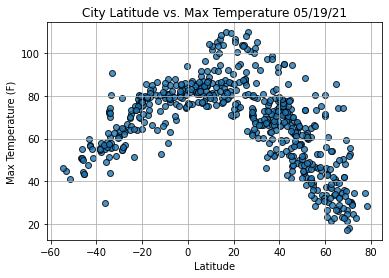

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

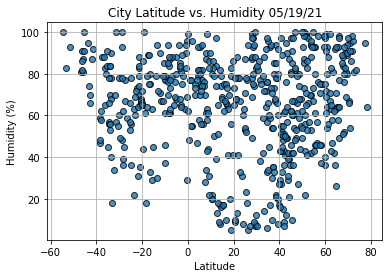

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

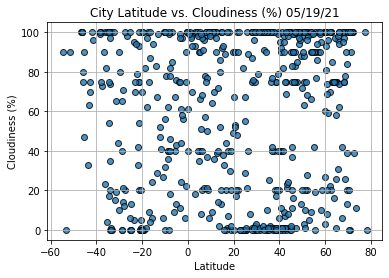

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

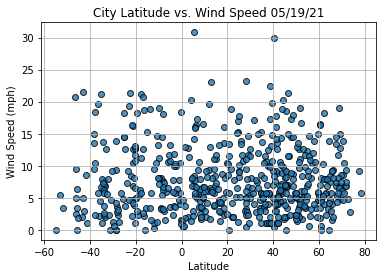

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [74]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [67]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2021-05-19 13:33:02
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    74.55
Humidity                       90
Cloudiness                     22
Wind Speed                    4.0
Name: 13, dtype: object

In [68]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-05-19 13:32:59,19.7297,-155.0900,70.79,86,90,10.36
4,Tilichiki,RU,2021-05-19 13:33:00,60.4667,166.1000,30.99,99,100,1.86
5,Barrow,US,2021-05-19 13:33:00,71.2906,-156.7887,30.22,86,90,6.91
6,Hasaki,JP,2021-05-19 13:33:00,35.7333,140.8333,63.28,93,100,4.94
7,Hambantota,LK,2021-05-19 13:33:01,6.1241,81.1185,84.54,77,20,16.35
...,...,...,...,...,...,...,...,...,...
567,Yingcheng,CN,2021-05-19 13:35:28,30.9500,113.5500,66.25,86,100,6.60
568,Shangzhi,CN,2021-05-19 13:35:29,45.2167,127.9667,63.50,62,2,6.93
569,Aklavik,CA,2021-05-19 13:35:29,68.2191,-135.0107,41.83,80,75,5.75
570,Anloga,GH,2021-05-19 13:35:29,5.7947,0.8973,91.62,72,8,15.93


In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

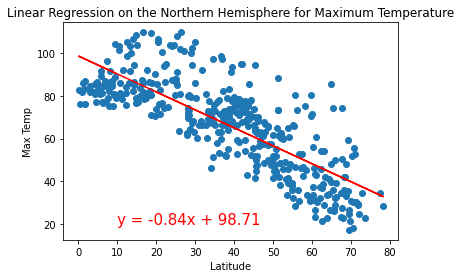

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,20))


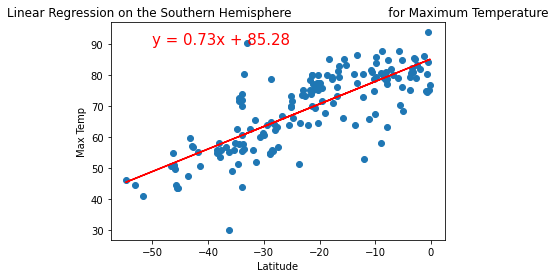

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [88]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7279114785837766, intercept=85.28229865416537, rvalue=0.7870354758840664, pvalue=5.0521821701304436e-36, stderr=0.044690033075828, intercept_stderr=1.153548100197677)

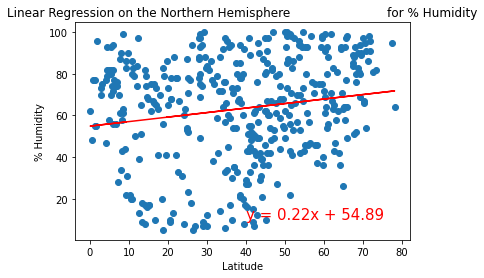

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


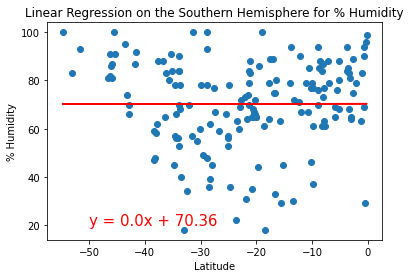

In [95]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,20))


In [93]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] )

LinregressResult(slope=0.21628543934039546, intercept=54.894390660348414, rvalue=0.1697449580478752, pvalue=0.000584014456862567, stderr=0.062395639470380564, intercept_stderr=2.6825149048664487)

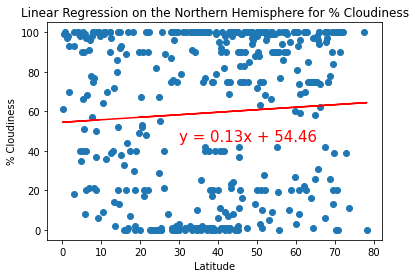

In [106]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,45))


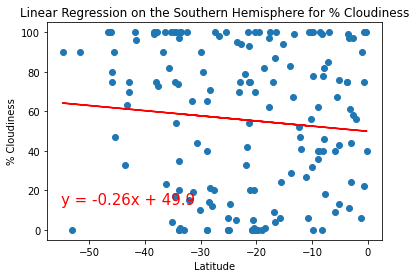

In [104]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,13))


In [117]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])


LinregressResult(slope=0.1270763014696104, intercept=54.46102927420074, rvalue=0.06347246496029446, pvalue=0.20129904291245787, stderr=0.09928304544309458, intercept_stderr=4.26837919223604)

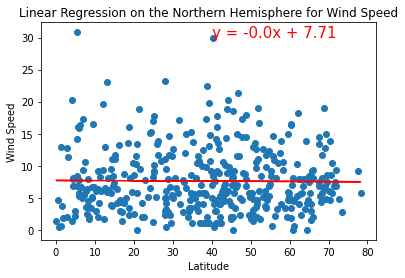

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))


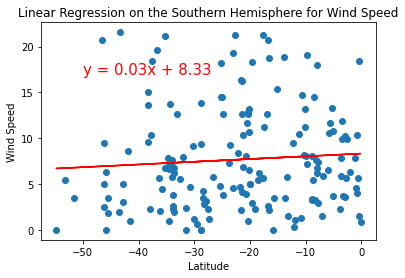

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,17))


In [ ]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] )